In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
#from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import os

In [73]:
df = pd.read_csv('/Users/nishchal/Downloads/FA DATA/MANAKSTEEL.NS.csv', encoding='cp1252').fillna(0)

In [74]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-13,8.00,9.25,8.00,8.65,8.65,20876.0
1,2016-04-18,8.55,8.95,8.50,8.75,8.75,8038.0
2,2016-04-20,8.50,8.80,8.05,8.65,8.65,7085.0
3,2016-04-21,8.90,8.90,8.10,8.55,8.55,4882.0
4,2016-04-22,8.05,8.65,8.05,8.65,8.65,1985.0


In [75]:
df.count

<bound method DataFrame.count of             Date       Open       High        Low      Close  Adj Close  \
0     2016-04-13   8.000000   9.250000   8.000000   8.650000   8.650000   
1     2016-04-18   8.550000   8.950000   8.500000   8.750000   8.750000   
2     2016-04-20   8.500000   8.800000   8.050000   8.650000   8.650000   
3     2016-04-21   8.900000   8.900000   8.100000   8.550000   8.550000   
4     2016-04-22   8.050000   8.650000   8.050000   8.650000   8.650000   
...          ...        ...        ...        ...        ...        ...   
1228  2021-04-06  24.799999  26.549999  24.799999  26.549999  26.549999   
1229  2021-04-07  27.500000  27.850000  27.000000  27.850000  27.850000   
1230  2021-04-08  28.400000  28.900000  26.500000  26.549999  26.549999   
1231  2021-04-09  26.500000  26.500000  25.500000  25.549999  25.549999   
1232  2021-04-12  25.000000  25.000000  24.299999  24.299999  24.299999   

        Volume  
0      20876.0  
1       8038.0  
2       7085.0 

Text(0.5, 1.0, 'Autocorrelation plot')

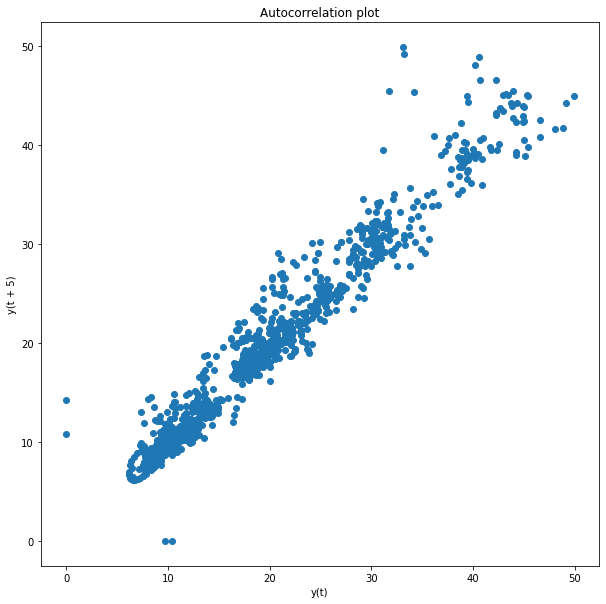

In [76]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('Autocorrelation plot')

In [77]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

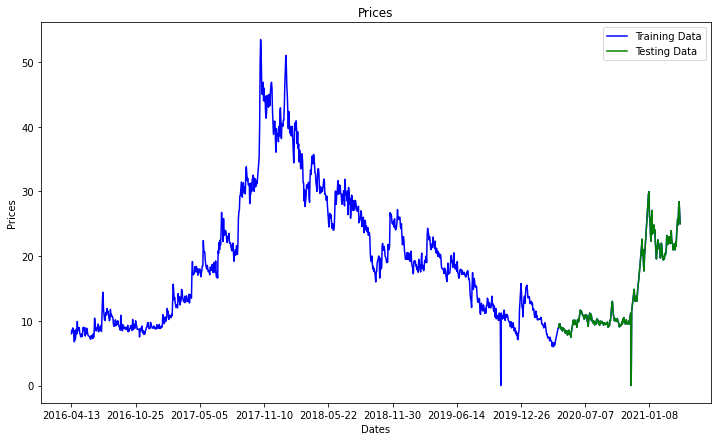

In [78]:

plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1240, 130), df['Date'][0:1240:130])
plt.legend()

In [79]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 25/ (np.abs(y_pred)+np.abs(y_true))))

In [80]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 1.426
Symmetric mean absolute percentage error: 5.293


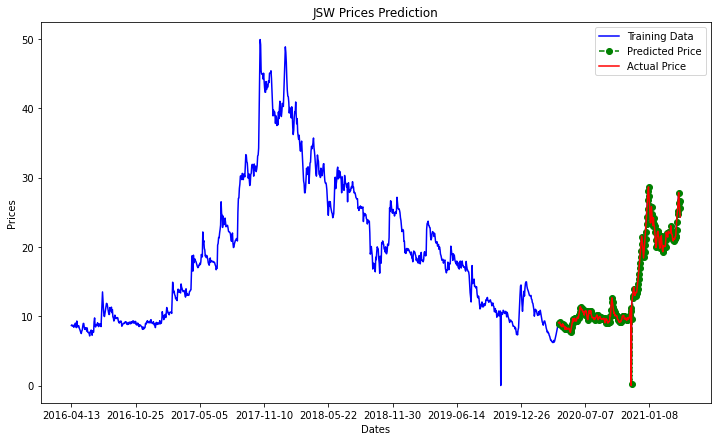

In [81]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('JSW Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1240, 130), df['Date'][0:1240:130])
plt.legend()

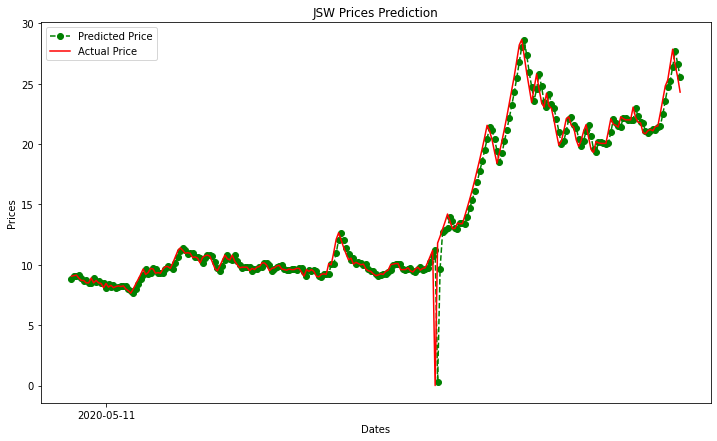

In [82]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.legend()
plt.title('JSW Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(1000,1299, 300), df['Date'][1000:1299:300])
plt.legend()

In [83]:
predictions[-11:-1]

[array([21.1322509]),
 array([21.41763329]),
 array([21.51036159]),
 array([22.45579159]),
 array([23.57147814]),
 array([24.70122973]),
 array([25.23999032]),
 array([26.39268465]),
 array([27.72606696]),
 array([26.66511696])]

In [84]:
forecast = model_fit.forecast(steps=15)[0]

In [85]:
forecast

array([25.55729798, 25.52095136, 25.5785574 , 25.63533306, 25.66242453,
       25.67655032, 25.68918955, 25.70091794, 25.71381896, 25.72742795,
       25.74125251, 25.75509682, 25.76890984, 25.78268429, 25.79644457])

In [86]:
s=predictions[-31:-1]

In [87]:
from pandas import DataFrame

In [88]:
df1=DataFrame (s,columns=['Expected Value'])

In [89]:
f1=DataFrame(forecast,columns=['Forecasted Values'])

In [90]:
df2=df.tail(30)

In [91]:
final = pd.concat([df2,df1,f1], axis=1)

In [92]:
final

,Date,Open,High,Low,Close,Adj Close,Volume,Expected Value,Forecasted Values
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.039274,25.557298
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.050365,25.520951
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.967537,25.578557
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.034720,25.635333
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.706175,25.662425
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.508045,25.676550
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.387758,25.689190
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.177206,25.700918
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.158940,25.713819
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.005036,25.727428


In [94]:
final.to_csv('ManakshiPredictions.csv')